# CS 109A/STAT 121A/AC 209A/CSCI E-109A: Homework 8
# Ensemble methods

**Harvard University**<br/>
**Fall 2017**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, Rahul Dave


Import libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import sklearn.metrics as metrics
from numpy import unravel_index
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV
%matplotlib inline

# Higgs Boson Discovery

The discovery of the Higgs boson in July 2012 marked a fundamental breakthrough in particle physics. The Higgs boson particle was discovered through experiments at the Large Hadron Collider at CERN, by colliding beams of protons at high energy. A key challenge in analyzing the results of these experiments is to differentiate between a collision that produces Higgs bosons and collisions thats produce only background noise. We shall explore the use of ensemble methods for this classification task.

You are provided with data from Monte-Carlo simulations of collisions of particles in a particle collider experiment. The training set is available in `Higgs_train.csv` and the test set is in `Higgs_test.csv`. Each row in these files corresponds to a particle colision described by 28 features (columns 1-28), of which the first 21 features are kinematic properties measured by the particle detectors in the accelerator, and the remaining features are derived by physicists from the the first 21 features. The class label is provided in the last column, with a label of 1 indicating that the collision produces Higgs bosons (signal), and a label of 0 indicating that the collision produces other particles (background). 

The data set provided to you is a small subset of the HIGGS data set in the UCI machine learning repository. The following paper contains further details about the data set and the predictors used: <a href = "https://www.nature.com/articles/ncomms5308">Baldi et al., Nature Communications 5, 2014</a>.


## Question 1 (2pt): Single Decision Tree
We start by building a basic model which we will use as our base model for comparison. 

1. Fit a decision tree model to the training set and report the classification accuracy of the model on the test set. Use 5-fold cross-validation to choose the (maximum) depth for the tree. You will use the max_depth you find here throughout the homework. 


In [2]:
df_train = pd.read_csv('Higgs_train.csv')
df_test = pd.read_csv('Higgs_test.csv')

In [3]:
y_train = df_train[' class']
y_test = df_test[' class']
X_train = df_train.drop(' class',axis=1)
X_test = df_test.drop(' class',axis=1)


In [4]:
df_train.describe()

,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,jet 2 pt,...,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb,class
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.978640,-0.014242,-0.018940,1.005780,0.002530,0.980407,0.025035,-0.007136,0.994617,0.988662,...,0.003368,1.008448,1.038472,1.027210,1.054741,1.023142,0.958457,1.033427,0.960473,0.524600
std,0.547021,1.011918,0.997988,0.591891,1.003353,0.463663,1.002021,1.014606,1.030335,0.476439,...,1.008882,1.401732,0.619626,0.353993,0.173192,0.427188,0.495710,0.352967,0.306009,0.499444
min,0.275063,-2.411601,-1.741953,0.010021,-1.742062,0.170481,-2.920213,-1.741237,0.000000,0.197668,...,-1.742136,0.000000,0.151059,0.442752,0.338730,0.370879,0.079460,0.412750,0.452206,0.000000
25%,0.586819,-0.763889,-0.877757,0.581321,-0.869805,0.676038,-0.658776,-0.884866,0.000000,0.665526,...,-0.869398,0.000000,0.798538,0.849911,0.985864,0.767558,0.671749,0.826300,0.772501,0.000000
50%,0.845502,-0.009307,-0.016055,0.903459,0.001296,0.890926,0.049486,-0.023503,1.086538,0.891397,...,-0.004703,0.000000,0.898054,0.957433,0.989756,0.922169,0.868331,0.951904,0.877457,1.000000
75%,1.219481,0.725066,0.836731,1.303024,0.865695,1.163526,0.715911,0.893814,2.173076,1.195013,...,0.858842,3.101961,1.032753,1.091803,1.031178,1.155744,1.122398,1.143154,1.061552,1.000000
max,5.325748,2.427076,1.742681,6.259064,1.742935,4.185626,2.962743,1.741454,2.173076,4.800826,...,1.743372,3.101961,10.642818,5.735043,3.938281,6.220779,5.075656,4.324610,3.496444,1.000000


In [5]:
# define a gini decision tree
dtree = DecisionTreeClassifier(criterion = 'gini')
# reasonable parameter grid
param_grid = {'max_depth': np.arange(1,50,1)}
from sklearn.model_selection import GridSearchCV
# since dataset is large, lets us use 10 fold, that is cv size of 500
grd = GridSearchCV(dtree,param_grid,cv=5)
grd.fit(df_train.drop(' class',axis=1).values,df_train[' class'].values)
print('Best max depth with Gini = %s' %grd.best_params_['max_depth'])

Best max depth with Gini = 5


In [6]:
print('Training Accuracy (Gini) = %s' %grd.score(df_train.drop(' class',axis=1).values,df_train[' class'].values))
print('Testing Accuracy (Gini) = %s' %grd.score(df_test.drop(' class',axis=1).values,df_test[' class'].values))

Training Accuracy (Gini) = 0.682
Testing Accuracy (Gini) = 0.6456


In [7]:
# define a gini decision tree
dtree = DecisionTreeClassifier(criterion = 'entropy')
# reasonable parameter grid
param_grid = {'max_depth': np.arange(1,50,1)}
from sklearn.model_selection import GridSearchCV
# since dataset is large, lets us use 10 fold, that is cv size of 500
grd = GridSearchCV(dtree,param_grid,cv=5)
grd.fit(df_train.drop(' class',axis=1).values,df_train[' class'].values)
print('Best max depth with Entropy = %s' %grd.best_params_['max_depth'])

Best max depth with Entropy = 4


In [8]:
print('Training Accuracy (entropy) = %s' %grd.score(df_train.drop(' class',axis=1).values,df_train[' class'].values))
print('Testing Accuracy (entropy) = %s' %grd.score(df_test.drop(' class',axis=1).values,df_test[' class'].values))

Training Accuracy (entropy) = 0.6578
Testing Accuracy (entropy) = 0.6526


## Question 2 (15pt): Dropout-based Approach
We start with a simple method inspired from the idea of 'dropout' in machine learning, where we fit multiple decision trees on random subsets of predictors, and combine them through a majority vote. The procedure is described below.

- For each predictor in the training sample, set the predictor values to 0 with probability $p$  (i.e. drop the predictor by setting it to 0). Repeat this for $B$ trials to create $B$ separate training sets.


- Fit decision tree models $\hat{h}^1(x), \ldots, \hat{h}^B(x) \in \{0,1\}$ to the $B$ training sets. You may allow the trees to have unrestricted depth.

- Combine the decision tree models into a single classifier by taking a majority vote:
$$
\hat{H}_{maj}(x) \,=\, majority\Big(\hat{h}^1(x), \ldots, \hat{h}^B(x)\Big).
$$


We shall refer to the combined classifier as an ** *ensemble classifier* **. Implement the described dropout approach, and answer the following questions:
1. Apply the dropout procedure with $p = 0.5$ for different number of trees (say $2, 4, 8, 16, \ldots, 256$), and evaluate the training and test accuracy of the combined classifier. Does an increase in the number of trees improve the training and test performance? Explain your observations in terms of the bias-variance trade-off for the classifier.
- Fix the number of trees to 64 and apply the dropout procedure with different dropout rates $p = 0.1, 0.3, 0.5, 0.7, 0.9$. Based on your results, explain how the dropout rate influences the bias and variance of the combined classifier.
- Apply 5-fold cross-validation to choose the optimal combination of the dropout rate and number of trees. How does the test performance of an ensemble of trees fitted with the optimal dropout rate and number of trees compare with the single decision tree model in Question 1?
[hint: Training with large number of trees can take long time. You may need to restrict the max number of trees.]

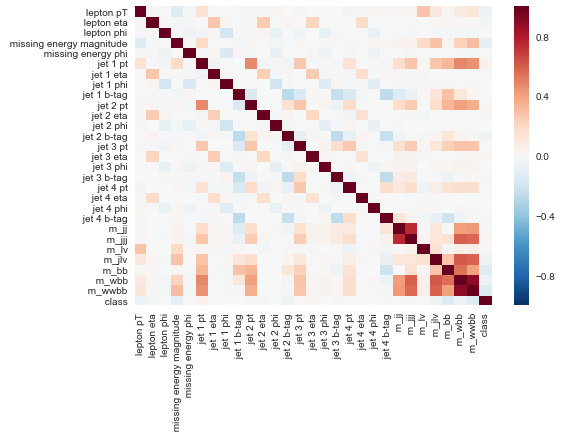

In [9]:
import seaborn as sns
sample = df_train.corr()
sns.heatmap(sample)

#### Part 1

In [10]:
y_train = df_train[' class'].values
y_test = df_test[' class'].values
X_train = df_train.drop(' class',axis=1)
X_test = df_test.drop(' class',axis=1)

# create the dropout functionality
def dropout(p,B):
    hhat_train = []
    hhat_test = []
    for i in range(B):
        zz = np.random.rand(len(X_train.columns))>p
        if np.sum(zz) != 0:
            xtr_temp_cols = X_train.columns[zz]
            xtrain = X_train[xtr_temp_cols].values
            dtree = DecisionTreeClassifier(criterion = 'gini',max_depth = 5)
            dtree.fit(xtrain,y_train)
    #         if i == 1:
    #             print(xtr_temp_cols)
    #             print(accuracy_score(y_train,dtree.predict(xtrain)))
            hhat_train.append(dtree.predict(xtrain))
            xtest = X_test[xtr_temp_cols].values
            hhat_test.append(dtree.predict(xtest))
    hhat_train = np.array(hhat_train)
    hhat_test = np.array(hhat_test)
    maj_hhat_train = stats.mode(hhat_train,axis=0)[0]
    maj_hhat_test = stats.mode(hhat_test,axis=0)[0]
    return maj_hhat_train,maj_hhat_test
        
        

In [14]:
pow2 = [2**(x) for x in range(1,8)]
train_acc = []
test_acc = []
for i in range(len(pow2)):
#     print(i)
    train_pred,test_pred = dropout(0.5,pow2[i])
    train_acc.append(accuracy_score(y_train.ravel(),train_pred.ravel()))
    test_acc.append(accuracy_score(y_test.ravel(),test_pred.ravel()))

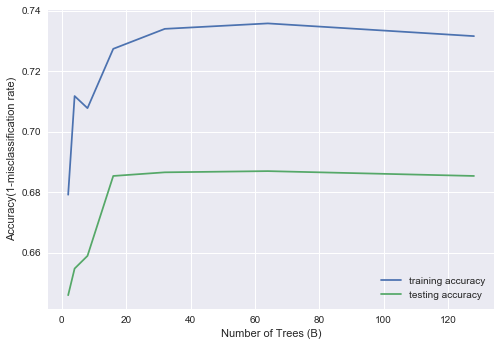

In [15]:
plt.figure()
plt.plot(pow2,train_acc,label='training accuracy')
plt.plot(pow2,test_acc,label='testing accuracy')
plt.xlabel('Number of Trees (B)')
plt.ylabel('Accuracy(1-misclassification rate)')
plt.legend()

#### Part 2

In [16]:
pvals = [0.1,0.3,.5,.7,.9]
train_acc = []
test_acc = []
for i in range(len(pvals)):
#     print(i)
    train_pred,test_pred = dropout(pvals[i],64)
    train_acc.append(accuracy_score(y_train.ravel(),train_pred.ravel()))
    test_acc.append(accuracy_score(y_test.ravel(),test_pred.ravel()))

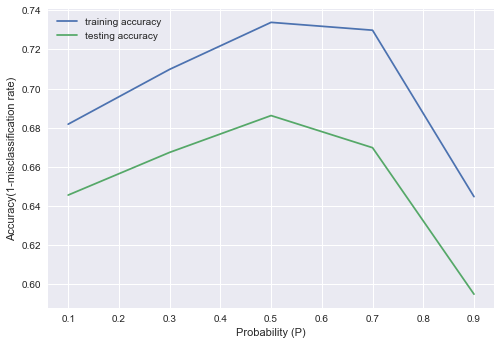

In [17]:
plt.figure()
plt.plot(pvals,train_acc,label='training accuracy')
plt.plot(pvals,test_acc,label='testing accuracy')
plt.xlabel('Probability (P)')
plt.ylabel('Accuracy(1-misclassification rate)')
plt.legend()

#### Part 3

In [19]:
y_train = df_train[' class'].values
y_test = df_test[' class'].values
X_train = df_train.drop(' class',axis=1)
X_test = df_test.drop(' class',axis=1)
def dropout(p,B,X_train,y_train,X_test,y_test):
    hhat_train = []
    hhat_test = []
    for i in range(B):
        zz = np.random.rand(len(X_train.columns))>p
        if np.sum(zz) !=0:
            xtr_temp_cols = X_train.columns[zz]
            xtrain = X_train[xtr_temp_cols].values
            dtree = DecisionTreeClassifier(criterion = 'gini',max_depth = 5)
            dtree.fit(xtrain,y_train)
            hhat_train.append(dtree.predict(xtrain))
            xtest = X_test[xtr_temp_cols].values
            hhat_test.append(dtree.predict(xtest))
    hhat_train = np.array(hhat_train)
    hhat_test = np.array(hhat_test)
    maj_hhat_train = stats.mode(hhat_train,axis=0)[0]
    maj_hhat_test = stats.mode(hhat_test,axis=0)[0]
    return maj_hhat_train,maj_hhat_test
        
        

In [20]:
from sklearn.model_selection import KFold
Bvals = [2**(x) for x in range(1,8)]
pvals = [.1,.3,.5,.7,.9]
accuracy_train_cv = np.zeros((len(Bvals),len(pvals),5))
accuracy_valid_cv = np.zeros((len(Bvals),len(pvals),5))

fold_ctr = 0
y_train = df_train[' class']
y_test = df_test[' class']
X_train = df_train.drop(' class',axis=1)
X_test = df_test.drop(' class',axis=1)

for itrain, ivalid in KFold(n_splits=5, shuffle=True, random_state=9001).split(X_train.index):
    # split
    X_train_cv = X_train.iloc[itrain,:]
    y_train_cv = y_train.iloc[itrain]
    X_valid_cv = X_train.iloc[ivalid,:]
    y_valid_cv = y_train.iloc[ivalid]
    
    for i in range(len(Bvals)):
        for j in range(len(pvals)):
            temptr,temptst = dropout(pvals[j],Bvals[i],X_train_cv,y_train_cv,X_valid_cv,y_valid_cv)
            accuracy_train_cv[i,j,fold_ctr] = accuracy_score(y_train_cv.ravel(),temptr.ravel())
            accuracy_valid_cv[i,j,fold_ctr]  = accuracy_score(y_valid_cv.ravel(),temptst.ravel())
    fold_ctr+=1

In [21]:
meanacc_train = np.mean(accuracy_train_cv,axis=2)
meanacc_test = np.mean(accuracy_valid_cv,axis=2)
std_train = np.std(accuracy_train_cv,axis=2)
std_test = np.std(accuracy_valid_cv,axis=2)

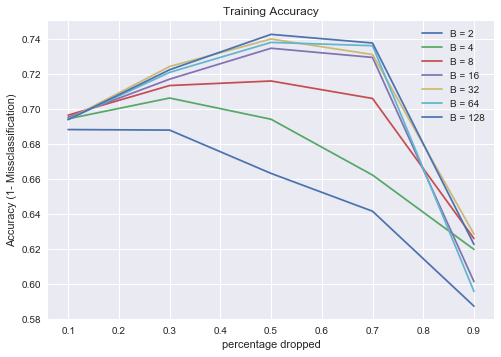

In [24]:
for i in range(len(Bvals)):
    plt.plot(pvals,meanacc_train[i,:],label = 'B = %s' %Bvals[i])
plt.legend()
plt.title('Training Accuracy')
plt.xlabel('percentage dropped')
plt.ylabel('Accuracy (1- Missclassification)')


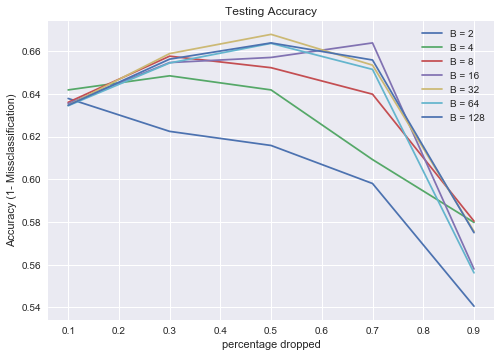

In [25]:
for i in range(len(Bvals)):
    plt.plot(pvals,meanacc_test[i,:],label = 'B = %s' %Bvals[i])
plt.legend()
plt.title('Testing Accuracy')
plt.xlabel('percentage dropped')
plt.ylabel('Accuracy (1- Missclassification)')


#### 2-D Visualization

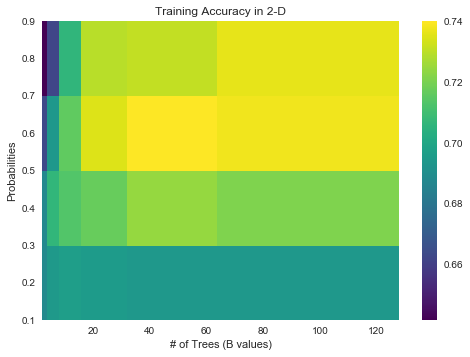

In [30]:
X,Y = np.meshgrid(Bvals,pvals)
Z = meanacc_train
plt.pcolor(X,Y,Z.T,cmap='viridis')
plt.colorbar()
plt.xlabel('# of Trees (B values)')
plt.ylabel('Probabilities')
plt.title('Training Accuracy in 2-D')

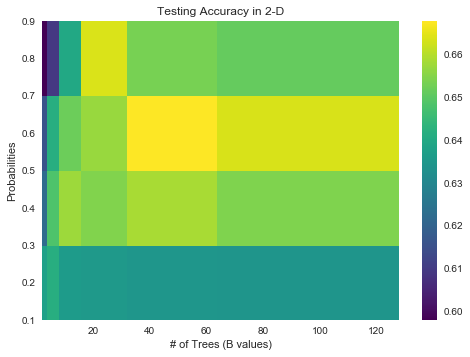

In [31]:
X,Y = np.meshgrid(Bvals,pvals)
Z = meanacc_test
plt.pcolor(X,Y,Z.T,cmap='viridis')
plt.colorbar()
plt.xlabel('# of Trees (B values)')
plt.ylabel('Probabilities')
plt.title('Testing Accuracy in 2-D')

In [33]:
unravel_index(meanacc_test.argmax(), meanacc_test.shape)

(4, 2)

In [36]:
print('Optimal # of Trees = %s, Optimal Drop Percent = %s' %(Bvals[4],pvals[2]))

Optimal # of Trees = 32, Optimal Drop Percent = 0.5


In [37]:
train_pred,test_pred = dropout(0.5,32,X_train,y_train,X_test,y_test)
print('Dropout Test Score = %s' %accuracy_score(y_test.ravel(),test_pred.ravel()))

Dropout Test Score = 0.683


## Questions

**Apply the dropout procedure with  p=0.5p=0.5  for different number of trees (say  2,4,8,16,…,2562,4,8,16,…,256 ), and evaluate the training and test accuracy of the combined classifier. Does an increase in the number of trees improve the training and test performance? Explain your observations in terms of the bias-variance trade-off for the classifier.**

- The increase in number of trees does really well to start off with and then flattens out on both the training and test set. I can imagine this is driven by the fact that adding more trees after some threshold means including the same predictors again.
- Initially we start off with high bias and high variance, our models are sensitive to new observations/new trees and the training and test accuracy are poor. As we increase number of trees, dependence on new observations diminish as we get closer to the true parameters so bias reduces but there is still some degree of variance. As the number of trees increases further, our variance reduces but we trade off high bias in doing so.

**Fix the number of trees to 64 and apply the dropout procedure with different dropout rates  p=0.1,0.3,0.5,0.7,0.9p=0.1,0.3,0.5,0.7,0.9 . Based on your results, explain how the dropout rate influences the bias and variance of the combined classifier.**

- At the far left (low probabilities) we have high bias (since we are away from the true beta's) but we have low variance since new p values in that area don't affect our prediction scores drastically. As we increase p we trade off variance for bias and we get slightly lower bias up until probability of 0.7. Beyond this point, the bias increases and so too does the variance. So at very high probabilities, we aren't capturing many features in our model and this means we have high variance and high bias.

**Apply 5-fold cross-validation to choose the optimal combination of the dropout rate and number of trees. How does the test performance of an ensemble of trees fitted with the optimal dropout rate and number of trees compare with the single decision tree model in Question 1? [hint: Training with large number of trees can take long time. You may need to restrict the max number of trees.]**

- The test performance of the ensemble of trees is 0.681 whereas it is 0.646 for the single decision tree. This indicates that the ensemble of trees with optimal dropout rate performs better. We can expect this if we are comparing the two methods since optimal dropout tries to minimize both bias and variance using a range of parameters on a range of different trees.

## Question 3 (15pt): Random Forests

We now move to a more sophisticated ensemble technique, namely random forest:
1. How does a random forest approach differ from the dropout procedure described in Question 2? 
 
- Fit random forest models to the training set for different number of trees (say $2, 4, 8, 16, \ldots, 256$), and evaluate the training and test accuracies of the models. You may set the number of predictors for each tree in the random forest model to $\sqrt{p}$, where $p$ is the total number of predictors. 

- Based on your results, do you find that a larger number of trees necessarily improves the test accuracy of a random forest model? Explain how the number of trees effects the training and test accuracy of a random forest classifier, and how this relates to the bias-variance trade-off for the classifier. 
  
- Fixing the number of trees to a reasonable value, apply 5-fold cross-validation to choose the optimal value for the  number of predictors. How does the test performance of random forest model fitted with the optimal number of trees compare with the dropout approach in Question 2?  





#### Part 1 - see QnA at end of this section

#### Part 2

In [38]:
rfscores = []
Bvals = [2**(x) for x in range(1,8)]

for i in range(len(Bvals)):
    rf = RandomForestClassifier(n_estimators = Bvals[i],max_depth = 5, max_features = 'sqrt',criterion ='gini')
    rf.fit(X_train,y_train)
    rfscores.append((rf.score(X_train,y_train),rf.score(X_test,y_test)))

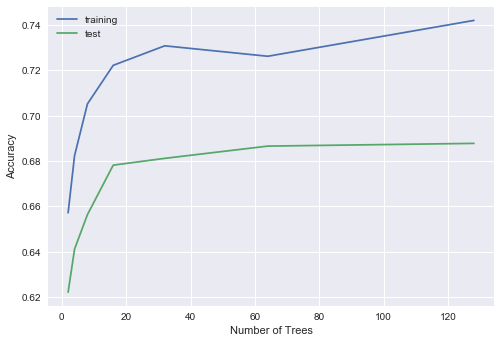

In [39]:
rfscores = np.array(rfscores)

plt.figure()
plt.plot(Bvals,rfscores[:,0],label ='training')
plt.plot(Bvals,rfscores[:,1],label='test')
plt.xlabel('Number of Trees')
plt.legend()
plt.ylabel('Accuracy')

In [40]:
from sklearn.model_selection import KFold
npredictors = [2*i for i in range(1,15)]
accuracy_train_cv = np.zeros((len(npredictors),5))
accuracy_valid_cv = np.zeros((len(npredictors),5))
fold_ctr = 0
y_train = df_train[' class']
y_test = df_test[' class']
X_train = df_train.drop(' class',axis=1)
X_test = df_test.drop(' class',axis=1)

for itrain, ivalid in KFold(n_splits=5, shuffle=True, random_state=9001).split(X_train.index):
    # in general though its good for creating consistent psets, don't put seeds into kfold
    # split
    X_train_cv = X_train.iloc[itrain,:]
    y_train_cv = y_train.iloc[itrain]
    X_valid_cv = X_train.iloc[ivalid,:]
    y_valid_cv = y_train.iloc[ivalid]
    
    for i in range(len(npredictors)):
        rf = RandomForestClassifier(n_estimators = 60, max_features =npredictors[i] ,criterion ='gini',max_depth = 5)
        rf.fit(X_train_cv,y_train_cv)
        accuracy_train_cv[i,fold_ctr] = rf.score(X_train_cv,y_train_cv)
        accuracy_valid_cv[i,fold_ctr] = rf.score(X_valid_cv,y_valid_cv)
    fold_ctr+=1

In [41]:
meanacc_rftrain = np.mean(accuracy_train_cv,axis=1)
stdacc_rftrain = np.std(accuracy_train_cv,axis=1)

meanacc_rftest = np.mean(accuracy_valid_cv,axis=1)
stdacc_rftest = np.std(accuracy_valid_cv,axis=1)


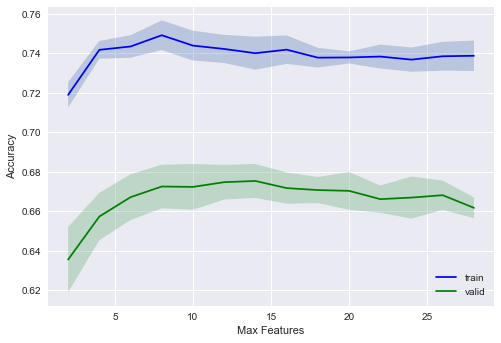

In [43]:
plt.figure(facecolor='white')
upp_train = meanacc_rftrain + stdacc_rftrain# this doesn't constrain accuracy to be less than 1
low_train = meanacc_rftrain - stdacc_rftrain
plt.plot(npredictors, meanacc_rftrain, color='blue', label='train')
plt.fill_between(npredictors, low_train, upp_train, alpha=0.3);

upp_valid = meanacc_rftest + stdacc_rftest# this doesn't constrain accuracy to be less than 1
low_valid = meanacc_rftest - stdacc_rftest
plt.plot(npredictors, meanacc_rftest, color='green', label='valid')
plt.fill_between(npredictors, low_valid, upp_valid, alpha=0.3);
plt.ylabel('Accuracy')
plt.xlabel('Max Features')
plt.legend(loc=4)

In [44]:
unravel_index(meanacc_rftest.argmax(), meanacc_rftest.shape)

(6,)

In [45]:
print('Optimal # of predictors = %s' %npredictors[8])

Optimal # of predictors = 18


In [46]:
# train model with the optimal
rf = RandomForestClassifier(n_estimators = 60, max_features =18, criterion ='gini',max_depth = 5)
rf.fit(X_train,y_train)
print('RF test score = %s' %rf.score(X_test,y_test))

RF test score = 0.6858


### Questions

**How does a random forest approach differ from the dropout procedure described in Question 2?
Fit random forest models to the training set for different number of trees (say  2,4,8,16,…,2562,4,8,16,…,256 ), and evaluate the training and test accuracies of the models. You may set the number of predictors for each tree in the random forest model to  p⎯⎯√p , where  pp  is the total number of predictors.**

- In a random forest you use bagging on the training set. This means you take observations with replacement and create multiple subsets of the original training set. You then select a subset of the number of features usually using sqrt of the total number of predictors. In dropout we do not do the first step, we only do the second and in some cases with RF the second method may even be fixed to sqrt(# of predictors).

**Based on your results, do you find that a larger number of trees necessarily improves the test accuracy of a random forest model? Explain how the number of trees effects the training and test accuracy of a random forest classifier, and how this relates to the bias-variance trade-off for the classifier.**

- More trees doesn't necessarily keep improving the score. In fact, we see that around 40 trees the marginal increase in trees actually hurts the performance before it climbs back up again.
- Both training and test accuracy perform poorly initially and then increase over time before stabilizing. This means that there was initially high bias and high variance since the accuracy was low and small changes in the number of trees was changing the accuracy meaningfully. Then we get to a point of lower bias and a situation where variance is also lower. The addition of more trees doesn't affect either of these so at some point we are no longer making as significant a trade off between bias and variance as we saw in the dropout method. Here, new trees seem to keep variance low without hurting bias.

**Fixing the number of trees to a reasonable value, apply 5-fold cross-validation to choose the optimal value for the number of predictors. How does the test performance of random forest model fitted with the optimal number of trees compare with the dropout approach in Question 2?**

- The test performance with Random Forest is marginally better with a test accuracy of 0.683 in relation to dropout which was 0.681. So RF does better and this makes some sense because we use bagging on the training set.

## Question 4 (15pt): Boosting

We next compare the random forest model with the approach of boosting:


1. Apply the AdaBoost algorithm to fit an ensemble of decision trees. Set the learning rate to 0.05, and try out different tree depths for the base learners: 1, 2, 10, and unrestricted depth.  Make a plot of the training accuracy of the ensemble classifier as a function of tree depths. Make a similar plot of the test accuracies as a function of number of trees (say $2, 4, 8, 16, \ldots, 256$).
- How does the number of trees influence the training and test performance? Compare and contrast between the trends you see in the training and test performance of AdaBoost and that of the random forest models in Question 3. Give an explanation for your observations.
- How does the tree depth of the base learner impact the training and test performance? Recall that with random forests, we allow the depth of the individual trees to be unrestricted. Would you recommend the same strategy for boosting? Explain your answer.
- Apply 5-fold cross-validation to choose the optimal number of trees $B$ for the ensemble and the optimal tree depth for the base learners. How does an ensemble classifier fitted with the optimal number of trees and the optimal tree depth compare with the random forest model fitted in Question 3.4? 



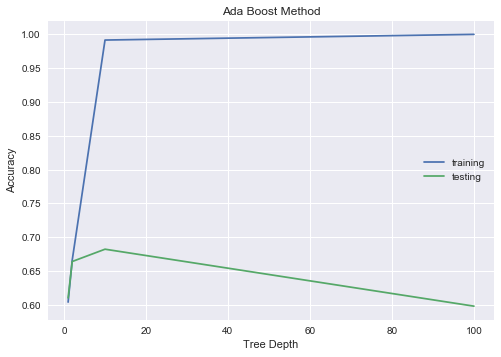

In [47]:
depth = [1,2,10,100]
scoread = []
scoreadtst = []
for i in range(len(depth)):
    adbst = AdaBoostClassifier(DecisionTreeClassifier(max_depth=depth[i]),learning_rate=.05,algorithm='SAMME')
    adbst.fit(X_train,y_train)
    scoread.append(adbst.score(X_train,y_train))
    scoreadtst.append(adbst.score(X_test,y_test))
plt.figure()
plt.plot(depth,scoread,label='training')
plt.plot(depth,scoreadtst,label='testing')
plt.legend()
plt.title('Ada Boost Method')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')

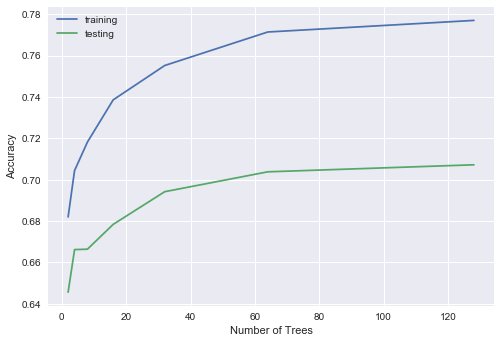

In [48]:
nvals = [2**(i) for i in range(1,8)]
scoread = []
scoreadtst = []
for i in range(len(nvals)):
    adbst = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators = nvals[i],learning_rate=.05,algorithm='SAMME')
    adbst.fit(X_train,y_train)
    scoread.append(adbst.score(X_train,y_train))
    scoreadtst.append(adbst.score(X_test,y_test))
plt.figure()
plt.plot(nvals,scoread,label='training')
plt.plot(nvals,scoreadtst,label='testing')
plt.legend()
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')

In [49]:
from sklearn.model_selection import KFold
nvals = [2**(x) for x in range(1,8)]
depth =[1,2,3,4,5]
accuracy_train_cv = np.zeros((len(nvals),len(depth),5))
accuracy_valid_cv = np.zeros((len(nvals),len(depth),5))

y_train = df_train[' class']
y_test = df_test[' class']
X_train = df_train.drop(' class',axis=1)
X_test = df_test.drop(' class',axis=1)

fold_ctr = 0

for itrain, ivalid in KFold(n_splits=5, shuffle=True, random_state=9001).split(X_train.index):
    # in general though its good for creating consistent psets, don't put seeds into kfold
    # split
    X_train_cv = X_train.iloc[itrain,:]
    y_train_cv = y_train.iloc[itrain]
    X_valid_cv = X_train.iloc[ivalid,:]
    y_valid_cv = y_train.iloc[ivalid]
    
    for i in range(len(nvals)):
        
        for j in range(len(depth)):
            adbst = AdaBoostClassifier(DecisionTreeClassifier(max_depth=depth[j]),n_estimators = nvals[i],learning_rate=.05,algorithm='SAMME.R')
            adbst.fit(X_train_cv,y_train_cv)
            accuracy_train_cv[i,j,fold_ctr] = adbst.score(X_train_cv,y_train_cv)
            accuracy_valid_cv[i,j,fold_ctr]  = adbst.score(X_valid_cv,y_valid_cv)
    fold_ctr+=1

In [50]:
meanacc_train = np.mean(accuracy_train_cv,axis=2)
meanacc_test = np.mean(accuracy_valid_cv,axis=2)


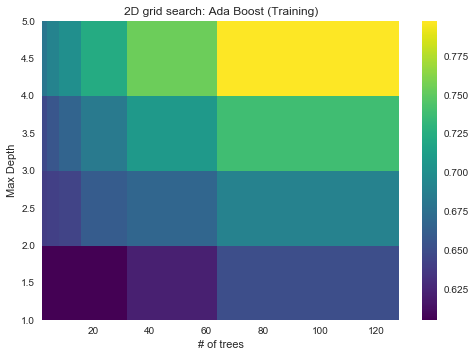

In [53]:
X,Y = np.meshgrid(nvals,depth)
Z = meanacc_train
plt.pcolor(X,Y,Z.T,cmap='viridis')
plt.colorbar()
plt.xlabel('# of trees')
plt.ylabel('Max Depth')
plt.title('2D grid search: Ada Boost (Training)')

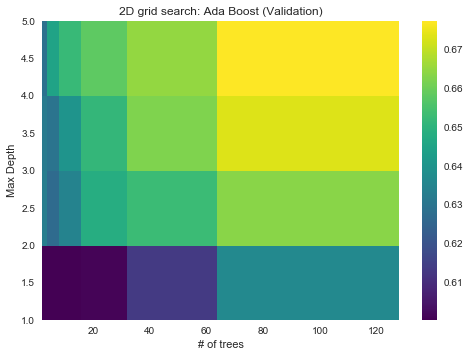

In [54]:
X,Y = np.meshgrid(nvals,depth)
Z = meanacc_test
plt.pcolor(X,Y,Z.T,cmap='viridis')
plt.colorbar()
plt.xlabel('# of trees')
plt.ylabel('Max Depth')
plt.title('2D grid search: Ada Boost (Validation)')

In [26]:
unravel_index(meanacc_test.argmax(), meanacc_test.shape)

(6, 2)

In [55]:
print('Optimal # of trees = %s, optimal depth = %s' %(nvals[6],depth[1]))

Optimal # of trees = 128, optimal depth = 2


In [57]:
y_train = df_train[' class']
y_test = df_test[' class']
X_train = df_train.drop(' class',axis=1)
X_test = df_test.drop(' class',axis=1)

adbst = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators = 128,learning_rate=.05,algorithm='SAMME.R')
adbst.fit(X_train,y_train)
print('AdaBoost Accuracy on Test = %s'%adbst.score(X_test,y_test))

AdaBoost Accuracy on Test = 0.6874


#### Questions


**How does the number of trees influence the training and test performance? Compare and contrast between the trends you see in the training and test performance of AdaBoost and that of the random forest models in Question 3. Give an explanation for your observations.**

- To compare this model with RF, we need to compare trends in the increase in number of trees. With this method, we see that an increase in number of trees leads to a point beyond which test accuracy looks relatively flat and training as well. In Random Forest, we see that testing accuracy can drop for a larger number of trees. This indicates that AdaBoost is more stable than RF and offers less variance and less bias than all the models presented so far. 
**How does the tree depth of the base learner impact the training and test performance? Recall that with random forests, we allow the depth of the individual trees to be unrestricted. Would you recommend the same strategy for boosting? Explain your answer.**

- increase in tree depth rapidly impacts training accuracy and pushes it to 1.0. As we can see, because of this rapid increase and (over fitting) the test score suffers as well. Therefore, it is not recommended to use an unrestricted depth for such a method.

**Apply 5-fold cross-validation to choose the optimal number of trees  BB  for the ensemble and the optimal tree depth for the base learners. How does an ensemble classifier fitted with the optimal number of trees and the optimal tree depth compare with the random forest model fitted in Question 3.4?**

- This AdaBoost method performs significantly better than the RF with a test score of 0.687 in comparison to RF which was 0.683 and dropout which was 0.681. We can expect this relationship because we see from our graphs that Adaboost really manages to minimize variance and bias beyond a certain number of trees.

## Question 5 (3pt): Meta-classifier

We have so far explored techniques that grow a collection of trees either by creating multiple copies of the original training set, or through a sequential procedure, and then combines these trees into a single classifier. Consider an alternate scenario where you are provided with a pre-trained collection of trees, say from different participants of a data science competition for Higgs boson discovery. What would be a good strategy to combine these pre-fitted trees into a single powerful classifier? Of course, a simple approach would be to take the majority vote from the individual trees. Can we do better than this simple combination strategy?

A collection of 100 decision tree classifiers is provided in the file `models.npy` and can be loaded into an array by executing:

`models = np.load('models.npy')`

You can make predictions using the $i^\text{th}$ model on an array of predictors `x` by executing:

`model[i].predict(x)`  &nbsp;&nbsp;&nbsp;
or &nbsp;&nbsp;&nbsp;
`model[i].predict_proba(x)`

and score the model on predictors `x` and labels `y` by using:

`model[i].score(x, y)`.

1. Implement a strategy to combine the provided decision tree classifiers, and compare the test perfomance of your approach with the majority vote classifier. Explain your strategy/algorithm.



In [4]:
models = np.load('models.npy',encoding = 'latin1')

In [10]:
train_meta = []
test_meta = []
for i in range(len(models)):
    train_meta.append(models[i].predict(X_train))
    test_meta.append(models[i].predict(X_test))

train_meta = np.array(train_meta).T
test_meta = np.array(test_meta).T
lrcv = LogisticRegressionCV(cv=5)
lrcv.fit(train_meta,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [12]:
print('The accuracy we get using Meta Classifier = %s' %accuracy_score(y_test,lrcv.predict(test_meta)))

The accuracy we get using Meta Classifier = 0.6896


#### Question

** Implement a strategy to combine the provided decision tree classifiers, and compare the test perfomance of your approach with the majority vote classifier. Explain your strategy/algorithm.**

- The approach I use is the following
1. take each classifier and predict a y value on the training and test set.
2. Use these y predictions as input to a logistic regression model to predict the actual response Y.
3. after cross validating and fitting, check the performance on the test set.


In taking this approach we are able to account for the predictions of each model and use that as input for another model. This meta classifier performs the best and we can see why the netflix competition was won by a method like this.
